# Titanic Data Set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic_train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Visualization

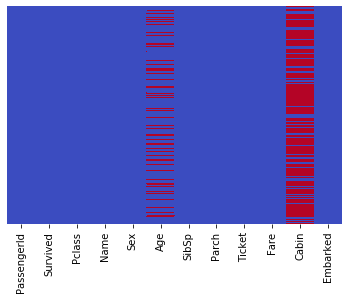

In [4]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

### :- Age has some missing values but cabin is mostly null.

# Data Cleaning

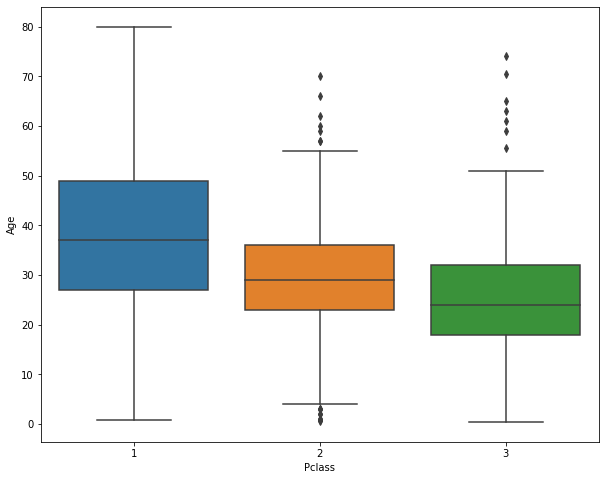

In [5]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [6]:
def fill_up(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [7]:
titanic['Age'] = titanic[['Age','Pclass']].apply(fill_up,axis=1)

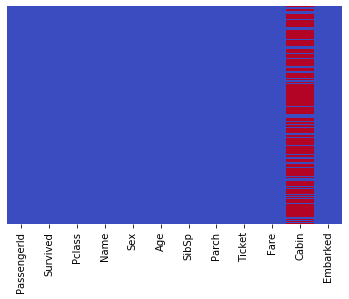

In [8]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [9]:
titanic.drop("Cabin",inplace=True,axis=1)

In [10]:
titanic.dropna(inplace=True)

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
Embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [13]:
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [14]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
titanic = pd.concat([titanic,sex,Embarked],axis=1)

In [16]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


In [17]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [18]:
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked'],inplace=True,axis=1)

In [19]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Train and Fit

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = titanic.drop('Survived',axis=1)

In [22]:
y= titanic['Survived']

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
LGmodel = LinearRegression()

In [26]:
LGmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
prediction= LGmodel.predict(X_test)

In [28]:
pd.DataFrame(prediction,y_test,columns=['Predicted'])

,Predicted
Survived,
0,0.114053
0,0.149294
1,0.727027
1,0.942019
0,0.150787
0,-0.076209
0,0.123383
0,0.256210
0,0.047612


# Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test,prediction.round())

array([[148,  15],
       [ 34,  70]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.82      0.67      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

